# Algorytmy statystyki praktycznej

#### Marta Kałużna


### Zadanie 1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

#### Proximal gradient

In [2]:
# funkcja pomocnicza
def soft_thresh(mu, x):
    if x > mu:
        return x - mu
    elif x < -mu:
        return x + mu
    else:
        return 0


def prox_grad(X, Y, beta, alpha = 0.0005, lambd = 1, num_iter = 150, scale = False):
    
    loss_prox = []
    mu = lambd * alpha
    n = X.shape[0]
    
    for i in range(num_iter):
        #print(beta)
        abs_sum = np.sum([abs(b) for b in beta])
        if not scale:
            loss = np.sum((Y - X @ beta)**2) + lambd * abs_sum
        # zmniejszenie wartości przyda się do zadania 2
        else:
            loss = np.sum((Y - X @ beta)**2)/n + lambd * abs_sum
            
        loss_prox.append(loss)
        
        beta = beta - alpha * X.T @ (X @ beta - Y)
        beta = [soft_thresh(mu, b) for b in beta]
    
        if i % 5 == 0:
            print('Iter: {}, Loss: {}'.format(i, loss))
        
    return loss_prox, beta

In [3]:
n = 100
d = 25
np.random.seed(10)
X = np.random.multivariate_normal([0.0]*d, np.eye(d), size = n)
w = np.random.randn(d)
beta = np.random.randn(d)
Y = X @ w

Iter: 0, Loss: 3706.10548453169
Iter: 5, Loss: 2325.1304237024196
Iter: 10, Loss: 1531.242216778392
Iter: 15, Loss: 1055.581922696467
Iter: 20, Loss: 758.7984972521353
Iter: 25, Loss: 564.5992156205334
Iter: 30, Loss: 432.529030249655
Iter: 35, Loss: 339.79712437971034
Iter: 40, Loss: 272.6690136876476
Iter: 45, Loss: 222.67900811656315
Iter: 50, Loss: 184.61233193765995
Iter: 55, Loss: 155.07511712678073
Iter: 60, Loss: 132.02817656688876
Iter: 65, Loss: 113.59913889011445
Iter: 70, Loss: 98.69843490093642
Iter: 75, Loss: 86.5433379508014
Iter: 80, Loss: 76.55509522174971
Iter: 85, Loss: 68.29750203846433
Iter: 90, Loss: 61.532047303747106
Iter: 95, Loss: 56.07063616657959
Iter: 100, Loss: 51.49979146749272
Iter: 105, Loss: 47.659224570529844
Iter: 110, Loss: 44.43492934982737
Iter: 115, Loss: 41.73821788514474
Iter: 120, Loss: 39.454354476686476
Iter: 125, Loss: 37.515942707839436
Iter: 130, Loss: 35.867699513524364
Iter: 135, Loss: 34.46394550848042
Iter: 140, Loss: 33.2667195199101

Text(0, 0.5, 'Loss')

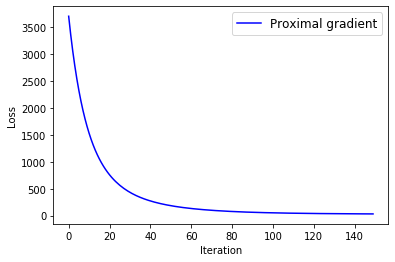

In [4]:
loss_prox = prox_grad(X, Y, beta)[0]

plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

#### Przyspieszenie Nesterova dla proximal gradient

In [5]:
def nesterov(X, Y, beta, alpha = 0.0005, lambd = 1, num_iter = 150, scale = False):

    loss_nest = []
    
    b = beta.copy()
    mu = alpha * lambd
    n = X.shape[0]
    for i in range(num_iter):
        abs_sum = np.sum([abs(b) for b in beta])
        if not scale:
            loss = np.sum((Y - X @ beta)**2) + lambd * abs_sum
        # zmniejszenie wartości przyda się do zadania 2
        else:
            loss = np.sum((Y - X @ beta)**2)/n + lambd * abs_sum
        loss_nest.append(loss)
        
        beta_old = beta.copy()
        b = b - alpha * X.T @ (X @ b - Y)
        beta = np.array([soft_thresh(mu, val) for val in b])
        b = beta + i/(i+3) * (beta - beta_old)

        if i % 5 == 0:
            print('Iter: {}, Loss: {}'.format(i, loss))
    
    return loss_nest, beta

In [6]:
n = 100
d = 25
np.random.seed(10)
X = np.random.multivariate_normal([0.0]*d, np.eye(d), size = n)
w = np.random.randn(d)
beta = np.random.randn(d)
Y = X @ w

Iter: 0, Loss: 3706.10548453169
Iter: 5, Loss: 2023.14416666631
Iter: 10, Loss: 729.5970881945393
Iter: 15, Loss: 235.59306574101413
Iter: 20, Loss: 91.59796425624839
Iter: 25, Loss: 42.88889677463387
Iter: 30, Loss: 30.36063347486025
Iter: 35, Loss: 30.422349067100782
Iter: 40, Loss: 30.959219826886617
Iter: 45, Loss: 29.14690452073421
Iter: 50, Loss: 26.976396159294726
Iter: 55, Loss: 26.302710119647877
Iter: 60, Loss: 26.79904123481127
Iter: 65, Loss: 27.120608147234027
Iter: 70, Loss: 26.792036055147758
Iter: 75, Loss: 26.24319718811234
Iter: 80, Loss: 25.941695623377612
Iter: 85, Loss: 25.924854987103064
Iter: 90, Loss: 25.974294263758498
Iter: 95, Loss: 25.964231441388606
Iter: 100, Loss: 25.928689235916753
Iter: 105, Loss: 25.939320181869455
Iter: 110, Loss: 26.00390365733501
Iter: 115, Loss: 26.058712706407103
Iter: 120, Loss: 26.045082085269545
Iter: 125, Loss: 25.977014397143446
Iter: 130, Loss: 25.915070849861948
Iter: 135, Loss: 25.892855304940152
Iter: 140, Loss: 25.896027

Text(0, 0.5, 'Loss')

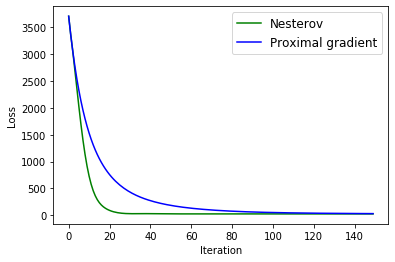

In [7]:
loss_nest = nesterov(X, Y, beta)[0]

plt.plot(np.arange(len(loss_nest)), loss_nest, 'g', label = 'Nesterov')
plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

#### ADMM

In [8]:
def ADMM(X, Y, beta, lambd = 1, rho = 100, num_iter = 150, scale = False):
    
    n, d = X.shape
    alpha = np.array([0] * d)
    w = np.array([0]*d)
    left = np.linalg.inv(X.T @ X + rho*np.identity(d))
    loss_admm = []
    
    for i in range(num_iter):
        abs_sum = np.sum([abs(a) for a in alpha])
        if not scale:
            loss = np.sum((Y - X @ beta)**2) + lambd * abs_sum
        # zmniejszenie wartości przyda się do zadania 2
        else:
            loss = np.sum((Y - X @ beta)**2)/n + lambd * abs_sum
        loss_admm.append(loss)
        
        beta = left @ (X.T @ Y + rho * (alpha - w))
        vec = beta + w
        alpha = [soft_thresh(lambd/rho, x) for x in vec]
        w = w + beta - alpha
        
        if i % 5 == 0:
            print('Iter: {}, Loss: {}'.format(i, loss))
 
    return loss_admm, beta

In [9]:
n = 100
d = 25
np.random.seed(10)
X = np.random.multivariate_normal([0.0]*d, np.eye(d), size = n)
w = np.random.randn(d)
beta = np.random.randn(d)
Y = X @ w

Iter: 0, Loss: 3685.5819837716103
Iter: 5, Loss: 56.2225709788281
Iter: 10, Loss: 27.6044255625168
Iter: 15, Loss: 26.09233593989247
Iter: 20, Loss: 25.94663067882387
Iter: 25, Loss: 25.923198399575636
Iter: 30, Loss: 25.91828864357364
Iter: 35, Loss: 25.917145891576293
Iter: 40, Loss: 25.916867572370876
Iter: 45, Loss: 25.916798099687334
Iter: 50, Loss: 25.916780475434866
Iter: 55, Loss: 25.916775950566365
Iter: 60, Loss: 25.9167747776824
Iter: 65, Loss: 25.916774471167887
Iter: 70, Loss: 25.916774390466866
Iter: 75, Loss: 25.916774369065898
Iter: 80, Loss: 25.916774363349013
Iter: 85, Loss: 25.916774361810123
Iter: 90, Loss: 25.916774361392484
Iter: 95, Loss: 25.91677436127815
Iter: 100, Loss: 25.916774361246556
Iter: 105, Loss: 25.916774361237742
Iter: 110, Loss: 25.91677436123525
Iter: 115, Loss: 25.91677436123455
Iter: 120, Loss: 25.916774361234342
Iter: 125, Loss: 25.916774361234282
Iter: 130, Loss: 25.91677436123426
Iter: 135, Loss: 25.916774361234257
Iter: 140, Loss: 25.9167743

Text(0, 0.5, 'Loss')

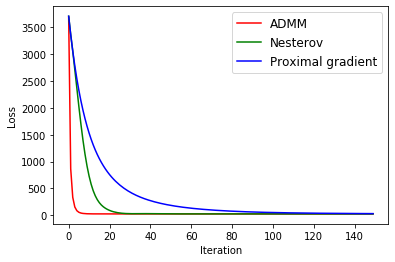

In [10]:
loss_admm = ADMM(X, Y, beta)[0]

plt.plot(np.arange(len(loss_admm)), loss_admm, 'r', label = 'ADMM')
plt.plot(np.arange(len(loss_nest)), loss_nest, 'g', label = 'Nesterov')
plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

**Źródła z których skorzystałam:**       
- http://niaohe.ise.illinois.edu/IE598_2016/pdf/IE598-lecture19-proximal%20gradient%20method%20and%20its%20acceleration.pdf
- https://www.stat.cmu.edu/~ryantibs/convexopt-F18/lectures/admm.pdf
- https://web.stanford.edu/~boyd/papers/pdf/admm_slides.pdf

### Zadanie 2

In [11]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
Y = df['price'].values
X = df.drop(['id', 'date', 'price', 'zipcode'], axis=1)

In [14]:
X = X.fillna(0)
X = X.replace(-np.inf, 0)

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
Y = np.log(Y)

In [16]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.insert(0, 'intercept', 1)

In [17]:
Xnp = X_scaled_df.values

In [18]:
Xnp.shape

(21613, 18)

##### Proximal gradient

In [19]:
np.random.seed(10)
beta = np.random.randn(18)
loss_prox = prox_grad(Xnp, Y, beta, lambd = 2, alpha = 0.0000001, num_iter = 500, scale = True)[0]

Iter: 0, Loss: 171.3896520842297
Iter: 5, Loss: 167.73271144141472
Iter: 10, Loss: 164.25058067997483
Iter: 15, Loss: 160.88530027003156
Iter: 20, Loss: 157.63024241687046
Iter: 25, Loss: 154.47934624149744
Iter: 30, Loss: 151.42706121257538
Iter: 35, Loss: 148.4682964557321
Iter: 40, Loss: 145.59837532354595
Iter: 45, Loss: 142.81299467438325
Iter: 50, Loss: 140.12756186114598
Iter: 55, Loss: 137.5538078929629
Iter: 60, Loss: 135.0510157837126
Iter: 65, Loss: 132.6161808245954
Iter: 70, Loss: 130.24651608643507
Iter: 75, Loss: 127.93943160819583
Iter: 80, Loss: 125.69251573498018
Iter: 85, Loss: 123.5035183797496
Iter: 90, Loss: 121.37033600679365
Iter: 95, Loss: 119.29099815624623
Iter: 100, Loss: 117.26365534798308
Iter: 105, Loss: 115.28656822026133
Iter: 110, Loss: 113.35809777369799
Iter: 115, Loss: 111.47669660481054
Iter: 120, Loss: 109.64090102553787
Iter: 125, Loss: 107.84932397606603
Iter: 130, Loss: 106.10064864804241
Iter: 135, Loss: 104.3936227439921
Iter: 140, Loss: 102.

Text(0, 0.5, 'Loss')

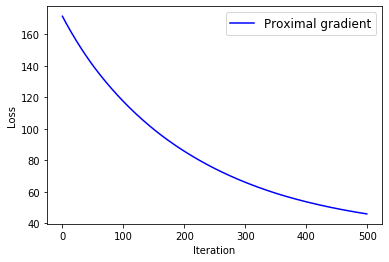

In [20]:
plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

##### Nesterov

In [21]:
np.random.seed(10)
beta = np.random.randn(18)
loss_nest = nesterov(Xnp, Y, beta, lambd = 2, alpha = 0.0000001, num_iter = 500, scale = True)[0]

Iter: 0, Loss: 171.3896520842297
Iter: 5, Loss: 166.6711025421384
Iter: 10, Loss: 158.20979075352753
Iter: 15, Loss: 146.61743102149774
Iter: 20, Loss: 133.09528741459468
Iter: 25, Loss: 118.5327128854586
Iter: 30, Loss: 103.67025691502135
Iter: 35, Loss: 89.29700756852864
Iter: 40, Loss: 76.0172786213945
Iter: 45, Loss: 64.31782587947305
Iter: 50, Loss: 54.587165568413006
Iter: 55, Loss: 46.82322855499174
Iter: 60, Loss: 41.07283824808134
Iter: 65, Loss: 37.258801386137904
Iter: 70, Loss: 35.21957661046877
Iter: 75, Loss: 34.41622316757184
Iter: 80, Loss: 34.465946518053535
Iter: 85, Loss: 35.09673968773756
Iter: 90, Loss: 35.940725521391556
Iter: 95, Loss: 36.79074413339872
Iter: 100, Loss: 37.35859985441204
Iter: 105, Loss: 37.579849933546306
Iter: 110, Loss: 37.43329659277011
Iter: 115, Loss: 36.91064671596234
Iter: 120, Loss: 36.14986458624336
Iter: 125, Loss: 35.17707522977561
Iter: 130, Loss: 34.120860066611456
Iter: 135, Loss: 33.07426201002781
Iter: 140, Loss: 32.1334819451954

Text(0, 0.5, 'Loss')

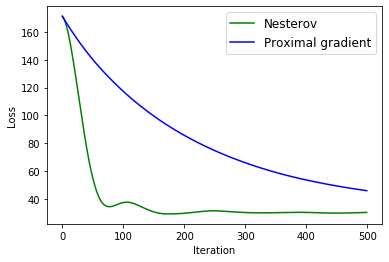

In [22]:
plt.plot(np.arange(len(loss_nest)), loss_nest, 'g', label = 'Nesterov')
plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

##### ADMM

In [23]:
np.random.seed(10)
beta = np.random.randn(18)
loss_admm = ADMM(Xnp, Y, beta, lambd = 2, rho = 10, num_iter = 500, scale = True)[0]

Iter: 0, Loss: 149.24978597700746
Iter: 5, Loss: 27.67083153300177
Iter: 10, Loss: 27.911470175179474
Iter: 15, Loss: 27.990345025730615
Iter: 20, Loss: 27.98679636085985
Iter: 25, Loss: 28.01114697151012
Iter: 30, Loss: 28.041247258087694
Iter: 35, Loss: 28.040681016656666
Iter: 40, Loss: 28.040855167070248
Iter: 45, Loss: 28.040805471798283
Iter: 50, Loss: 28.040818661278767
Iter: 55, Loss: 28.04081543494049
Iter: 60, Loss: 28.040816142591133
Iter: 65, Loss: 28.04081601369468
Iter: 70, Loss: 28.040816027702647
Iter: 75, Loss: 28.04081603028404
Iter: 80, Loss: 28.04081602777911
Iter: 85, Loss: 28.040816028933076
Iter: 90, Loss: 28.040816028505418
Iter: 95, Loss: 28.04081602864603
Iter: 100, Loss: 28.040816028603658
Iter: 105, Loss: 28.04081602861565
Iter: 110, Loss: 28.04081602861241
Iter: 115, Loss: 28.040816028613037
Iter: 120, Loss: 28.04081602861298
Iter: 125, Loss: 28.040816028613264
Iter: 130, Loss: 28.040816028613037
Iter: 135, Loss: 28.04081602861315
Iter: 140, Loss: 28.040816

Text(0, 0.5, 'Loss')

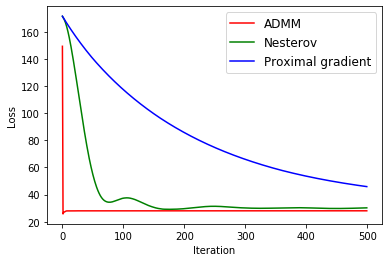

In [24]:
plt.plot(np.arange(len(loss_admm)), loss_admm, 'r', label = 'ADMM')
plt.plot(np.arange(len(loss_nest)), loss_nest, 'g', label = 'Nesterov')
plt.plot(np.arange(len(loss_prox)), loss_prox, 'b', label = 'Proximal gradient')
plt.legend(prop = {'size':12})
plt.xlabel('Iteration')
plt.ylabel('Loss')

**Przewidywanie cen domów**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xnp, Y, train_size=0.8, random_state=10)

In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((17290, 18), (4323, 18), (17290,), (4323,))

In [27]:
beta_admm = ADMM(X_train, Y_train, beta, lambd = 2, rho = 10, num_iter = 50, scale = True)[1]

Iter: 0, Loss: 149.00220051454042
Iter: 5, Loss: 27.65845311440832
Iter: 10, Loss: 27.898197971315504
Iter: 15, Loss: 27.975525081543573
Iter: 20, Loss: 27.971970376875948
Iter: 25, Loss: 28.009043584166925
Iter: 30, Loss: 28.023810907346405
Iter: 35, Loss: 28.027214574352147
Iter: 40, Loss: 28.028290295040204
Iter: 45, Loss: 28.028022874155294


In [28]:
beta_admm

array([ 1.30455129e+01, -9.43603287e-03,  5.02916984e-02,  1.26145232e-01,
        1.80858117e-02,  3.35755699e-02,  3.37972080e-02,  4.21816895e-02,
        4.49161592e-02,  1.91037886e-01, -8.70700176e-06,  3.95455152e-03,
       -9.19532481e-02,  1.65844011e-02,  1.87294575e-01, -7.39379798e-03,
        7.06778712e-02, -8.84447381e-03])

Zlogarytmowane ceny domów:

In [29]:
log_prices = pd.DataFrame({'predicted': X_test @ beta_admm, 'real': Y_test})
log_prices.head(25)

,predicted,real
0,12.651645,12.685408
1,13.165734,13.444447
2,11.324758,11.863582
3,13.021025,13.235692
4,12.997157,13.208541
5,12.323948,12.466512
6,13.116668,12.948010
7,12.700714,12.628067
8,12.761098,12.474190
9,13.982315,13.959611


Mean squared error:

In [30]:
np.sum((log_prices['real'] - log_prices['predicted'])**2)/log_prices.shape[0]

0.06324551793557755

Faktyczne ceny domów:

In [31]:
pred_prices = np.exp(X_test @ beta_admm)
round_pred_prices = [round(x,2) for x in pred_prices]
prices = pd.DataFrame({'predicted': round_pred_prices, 'real': np.exp(Y_test)})
prices.head(25)

,predicted,real
0,312276.71,323000.0
1,522162.63,690000.0
2,82847.59,142000.0
3,451813.40,560000.0
4,441157.30,545000.0
5,225020.75,259500.0
6,497160.25,420000.0
7,327982.01,305000.0
8,348397.16,261500.0
9,1181523.53,1155000.0


Mean squared error:

In [32]:
np.sum((prices['real'] - prices['predicted'])**2)/prices.shape[0]

44029120266.37442